![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

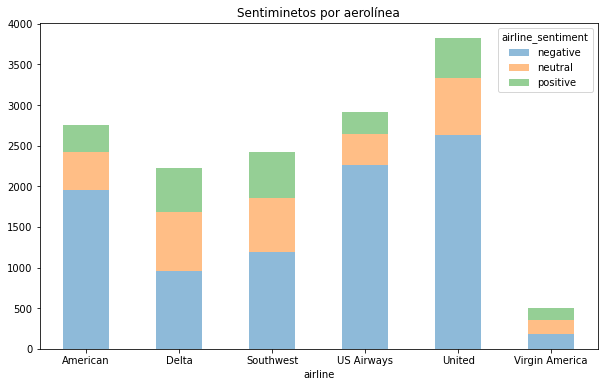

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import metrics

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
vect_1 = CountVectorizer(lowercase=False)
X_train_vect = vect_1.fit_transform(X_train)

In [12]:
# Se estima el mejor parametro para el número de estimadores a usar en el random forest
acc = []
for i in range(1,20):
    modeloRF = RandomForestClassifier(n_estimators=i, random_state=1234, n_jobs=-1)
    acc.append(cross_val_score(modeloRF, X_train_vect, y_train, cv=4, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

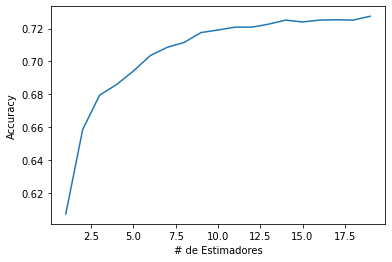

In [13]:
plt.plot(range(1,20), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

Se encuentra que el valor a usar en el número de estimadores del random forest va a ser de 13, ya que a partir de ese valor se evidencia que no se obtiene una gran mejoría del accuracy, mientras que, se le adiciona más complejidad al modelo.

In [15]:
modeloRF = RandomForestClassifier(n_estimators=13, random_state=1234, n_jobs=-1)
modeloRF.fit(X_train_vect, y_train)

y_pred = modeloRF.predict(vect_1.transform(X_test))

RF_accuracy = metrics.accuracy_score(y_pred, y_test)
print("El accuracy del RF es de: ", RF_accuracy)

El accuracy del RF es de:  0.746067880794702


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 2
vect_2 = CountVectorizer(lowercase=False,stop_words='english')
X_train_sw = vect_2.fit_transform(X_train)

Text(0, 0.5, 'Accuracy')

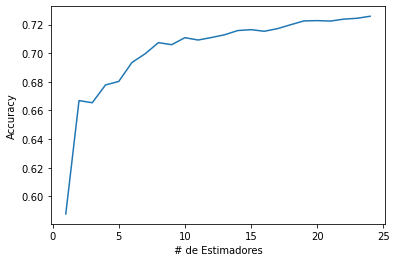

In [17]:
# Se estima el mejor parametro para el número de estimadores a usar en el random forest
acc = []
for i in range(1,25):
    modeloRF_SW = RandomForestClassifier(n_estimators=i, random_state=1234, n_jobs=-1)
    acc.append(cross_val_score(modeloRF_SW, X_train_sw, y_train, cv=4, scoring='accuracy').mean())

plt.plot(range(1,25), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

De la gráfica se logra identificar que el valor óptimo en este caso para el número de estimadores a usar en un Random Forest es de 19, por lo cuál se realizará el entrenamiento haciendo uso de este valor.

In [19]:
modeloRF_SW = RandomForestClassifier(n_estimators=19, random_state=1234, n_jobs=-1)
modeloRF_SW.fit(X_train_sw, y_train)

y_pred_sw = modeloRF_SW.predict(vect_2.transform(X_test))

RF_accuracy_sw = metrics.accuracy_score(y_pred_sw, y_test)
print("El accuracy del RF quitando las stop words es de: ", RF_accuracy_sw)

El accuracy del RF quitando las stop words es de:  0.7454470198675497


Se logra observar que a pesar de hacer la eliminación de las stop words, en este caso el accuracy resultante del modelo empeora en comparación al obtenido antes de hacer la eliminación de dichas palabras.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
# Celda 3
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juanavalentinasanchez/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/juanavalentinasanchez/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [21]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas, lematizando el texto con verbos
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

In [22]:
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
X_train_lemas = vect_lemas.fit_transform(X_train)

Text(0, 0.5, 'Accuracy')

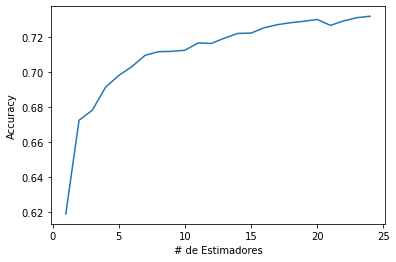

In [23]:
# Se estima el mejor parametro para el número de estimadores a usar en el random forest
acc = []
for i in range(1,25):
    modeloRF_Lemas = RandomForestClassifier(n_estimators=i, random_state=1234, n_jobs=-1)
    acc.append(cross_val_score(modeloRF_Lemas, X_train_lemas, y_train, cv=4, scoring='accuracy').mean())

plt.plot(range(1,25), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

En este caso, también se hará uso de un total de 19 estimadores en el modelo de Random Forest, ya que como se evidencia en la anterior gráfica, es el valor que toma un valor alto del accuracy sin castigar de más en el rendimiento del modelo.

In [24]:
modeloRF_Lemas = RandomForestClassifier(n_estimators=19, random_state=1234, n_jobs=-1)
modeloRF_Lemas.fit(X_train_lemas, y_train)

y_pred_lemas = modeloRF_Lemas.predict(vect_lemas.transform(X_test))

RF_accuracy_lemas = metrics.accuracy_score(y_pred_lemas, y_test)
print("El accuracy del RF lematizando con verbos es de: ", RF_accuracy_lemas)

El accuracy del RF lematizando con verbos es de:  0.7512417218543046


Haciendo uso de este procedimiento, se encuentra un accuracy mejor que el encontrado en los casos anteriores, por tal motivo, es el mejor modelo hasta el momento.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [25]:
# Celda 4
vect_combi = CountVectorizer(analyzer=split_into_lemmas, lowercase=False, stop_words='english')
X_train_combi = vect_combi.fit_transform(X_train)

Text(0, 0.5, 'Accuracy')

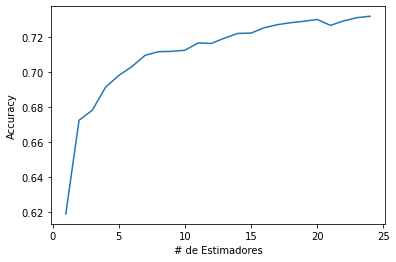

In [26]:
# Se estima el mejor parametro para el número de estimadores a usar en el random forest
acc = []
for i in range(1,25):
    modeloRF_combi = RandomForestClassifier(n_estimators=i, random_state=1234, n_jobs=-1)
    acc.append(cross_val_score(modeloRF_combi, X_train_combi, y_train, cv=4, scoring='accuracy').mean())

plt.plot(range(1,25), acc)
plt.xlabel('# de Estimadores')
plt.ylabel('Accuracy')

In [27]:
modeloRF_combi = RandomForestClassifier(n_estimators=19, random_state=1234, n_jobs=-1)
modeloRF_combi.fit(X_train_combi, y_train)

y_pred_combi = modeloRF_combi.predict(vect_combi.transform(X_test))

RF_accuracy_combi = metrics.accuracy_score(y_pred_combi, y_test)
print("El accuracy del RF quitando las stop words y lematizando es de: ", RF_accuracy_combi)

El accuracy del RF quitando las stop words y lematizando es de:  0.7512417218543046


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

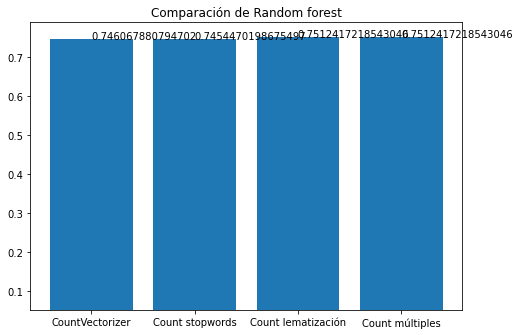

In [28]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Random forest")
ejeX = ['CountVectorizer','Count stopwords' ,'Count lematización','Count múltiples']
ejeY = [RF_accuracy,RF_accuracy_sw,RF_accuracy_lemas,RF_accuracy_combi]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.ylim(0.05)
plt.show()

De acuerdo con los resultados se puede evidenciar que el mejor modelo de Random Forest es el que contiene la técniza de lematización ya que presenta un accuracy mayor al resto. Cabe resaltar que el modelo que combina las técnicas de stopwords y lematización tiene el mismo accuracy que el que sólo tiene la técnica de lematización, por lo cual se puede inferir que en este caso quitar las stopwords no aporta nada al modelo.